## Number Plate Recognition Using EASYOCR

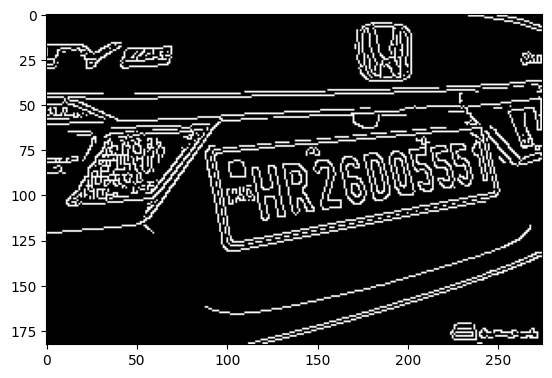

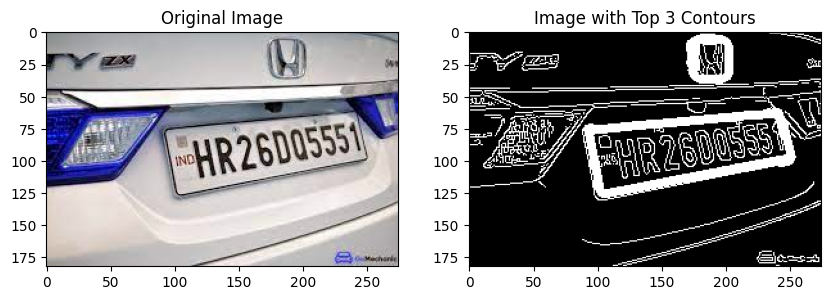

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Number Plate Text: K~HR26D05551)


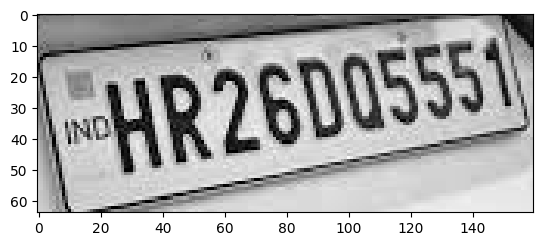

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


# Reducing noise (Apply Non-Local Means Denoising)
denoised_image = cv2.fastNlMeansDenoising(gray, None, h=10, templateWindowSize=7, searchWindowSize=21)
plt.imshow(denoised_image, cmap='gray')

# drawing edges
edges = cv2.Canny(denoised_image, threshold1=100, threshold2=200)
plt.imshow(edges, cmap='gray')


# Apply thresholding
_, thresholded = cv2.threshold(edges, 125, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Draw only the top 3 contours on a copy of the original image
contour_image = edges.copy()
cv2.drawContours(contour_image, contours[:2], -1, (255, 255, 255), 5)


# Display the original image and the one with top 3 contours using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Image with Top 3 Contours')

plt.show()

# masking the image
mask = np.zeros(gray.shape, np.uint8)
location = contours[0]  # Assuming you want to use the first contour
cv2.drawContours(mask, [location], 0, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)

(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
number_plate_text = result[0][1]
print('Number Plate Text:', number_plate_text)